STEP-1 Data Collection And Loading Dataset

In [10]:
import pandas as pd
import numpy as np

In [11]:
true=pd.read_csv("True.csv")

In [12]:
fake=pd.read_csv("fake.csv")

STEP-2 Data Preprocessing

In [14]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [15]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [16]:
true['label']=1

In [17]:
fake['label']=0

In [18]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [19]:
news=pd.concat([fake,true],axis=0)

In [20]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [21]:
news.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [22]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [23]:
du=news.duplicated()
print(du)

0        False
1        False
2        False
3        False
4        False
         ...  
21412    False
21413    False
21414    False
21415    False
21416    False
Length: 44898, dtype: bool


STEP-3 Feature Selection

In [25]:
news=news.drop(['title','subject','date'],axis=1)

In [26]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [27]:
news=news.sample(frac=1)

In [28]:
news.head()

,text,label
14838,MANILA (Reuters) - Philippines President Rodri...,1
17623,This story is about more than a massive cover-...,0
18676,"PARIS (Reuters) - Some 700 French adults, one-...",1
57,WASHINGTON (Reuters) - Republican leaders in t...,1
20485,They preyed on the poor in Latin America. They...,0


In [29]:
news.reset_index(inplace=True)

In [30]:
news.head()

,index,text,label
0,14838,MANILA (Reuters) - Philippines President Rodri...,1
1,17623,This story is about more than a massive cover-...,0
2,18676,"PARIS (Reuters) - Some 700 French adults, one-...",1
3,57,WASHINGTON (Reuters) - Republican leaders in t...,1
4,20485,They preyed on the poor in Latin America. They...,0


In [31]:
news.drop(['index'],axis=1,inplace=True)

In [32]:
news.head()

,text,label
0,MANILA (Reuters) - Philippines President Rodri...,1
1,This story is about more than a massive cover-...,0
2,"PARIS (Reuters) - Some 700 French adults, one-...",1
3,WASHINGTON (Reuters) - Republican leaders in t...,1
4,They preyed on the poor in Latin America. They...,0


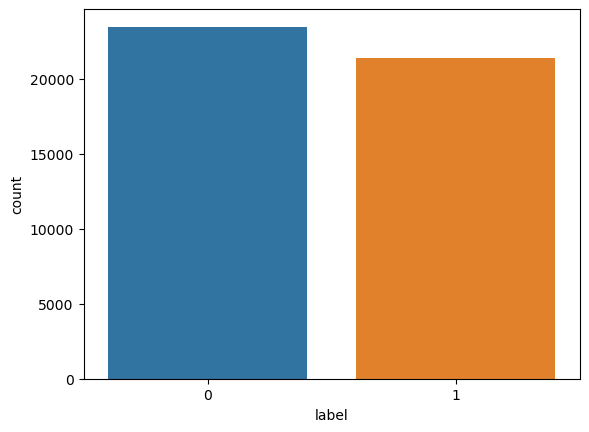

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=news, x='label', order=news['label'].value_counts().index)
plt.show()


In [34]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /Users/vrund/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/vrund/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [ ]:
preprocessed_review = preprocess_text(news['text'].values)
news['text'] = preprocessed_review


 67%|███████████████████████▍           | 30131/44898 [06:42<03:15, 75.45it/s]

In [ ]:
# Real
consolidated = ' '.join(
    word for word in news['text'][news['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Fake
consolidated = ' '.join(
    word for word in news['text'][news['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
def wordopt(text):
    text=text.lower()
    text=re.sub(r'https?://\S+|www.\.\S+','',text)
    text=re.sub(r'<.*?>','',text)
    text=re.sub(r'[^\w\s]','',text)
    text=re.sub(r'\d','',text)
    text=re.sub(r'\n','',text)
    return text


 

In [ ]:
news['text']=news['text'].apply(wordopt)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(news['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)


STEP-4 Feature Extraction

In [ ]:
news.info()

In [ ]:
news['text']

In [ ]:
x=news['text']
y=news['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()

In [ ]:
xv_train=vectorization.fit_transform(x_train)

In [ ]:
xv_test = vectorization.transform(x_test)


In [ ]:
xv_train

STEP-5 Model Selection

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(xv_train,y_train)

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test,y_test)

In [ ]:
print(classification_report (y_test,pred_lr))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC = DecisionTreeClassifier()

In [ ]:
DTC.fit(xv_train,y_train)

In [ ]:
pred_dtc= DTC.predict(xv_test)

In [ ]:
DTC.score(xv_test,y_test)

In [ ]:
print(classification_report(y_test,pred_dtc))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier()

In [ ]:
rfc.fit(xv_train,y_train)

In [ ]:
pred_rfc = rfc.predict(xv_test)

In [ ]:
rfc.score(xv_test,y_test)

In [ ]:
print(classification_report(y_test,pred_rfc))

In [ ]:
def output_label(n):
    if n==0:
        return "It is a Fake News"
    elif n==1:
        return"It is a Genuine News"

In [ ]:
def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_lr = LR.predict(new_xv_test)
    # pred_dtc=dtc.predict(new_xv_test)
    pred_rfc=rfc.predict(new_xv_test)
    return "\n\nLR Prediction:{} \nRFC Prediction: {}".format(
    output_label(pred_lr[0]), output_label(pred_rfc[0])
)

In [ ]:
manual_testing(news_article)